In [79]:
from astropy.io import fits
from astropy.wcs import WCS
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import regions as rg
import astropy.units as u
from astropy.nddata.utils import Cutout2D
import scipy.ndimage
from scipy.optimize import curve_fit
import sys as os
import scipy.stats


plt.rcParams.update({'font.size': 15})


In [80]:
CO = fits.open("./RadioSuperConvolved.fits")
COhead = CO[1].header
COdata = CO[1].data
print(COdata)
wcs = WCS(COhead)
COdata = np.nan_to_num(COdata, 0)
w = WCS(naxis=2)
w.wcs.ctype=["RA---TAN", "DEC--TAN"]
w.wcs.crval=[149.015299941, 69.691791423]
w.wcs.crpix=[127.0, 117.0]
w.wcs.cdelt=[-0.00111111, 0.00111111]

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


Set OBSGEO-B to    44.633889 from OBSGEO-[XYZ].
Set OBSGEO-H to     2556.989 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


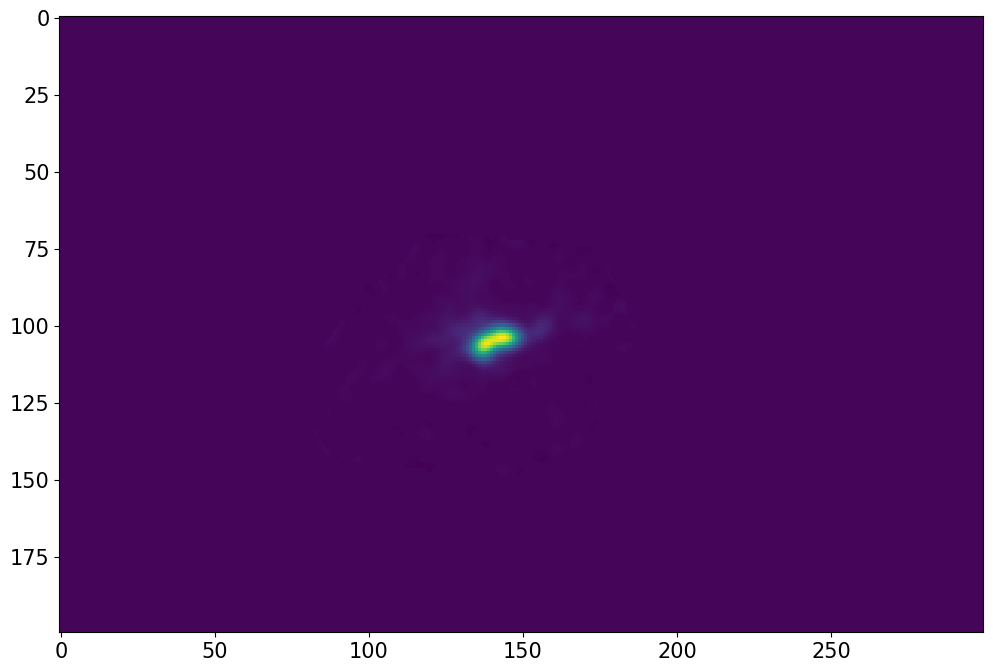

In [81]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(COdata)

0.06080042245298521


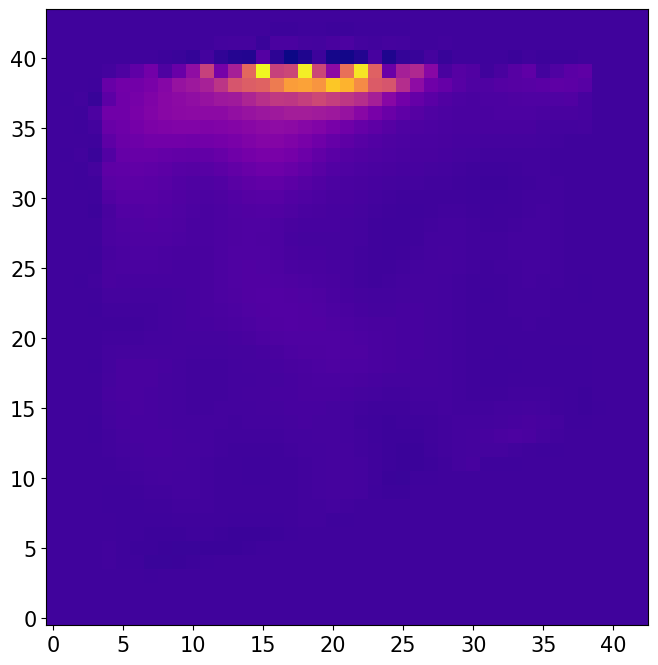

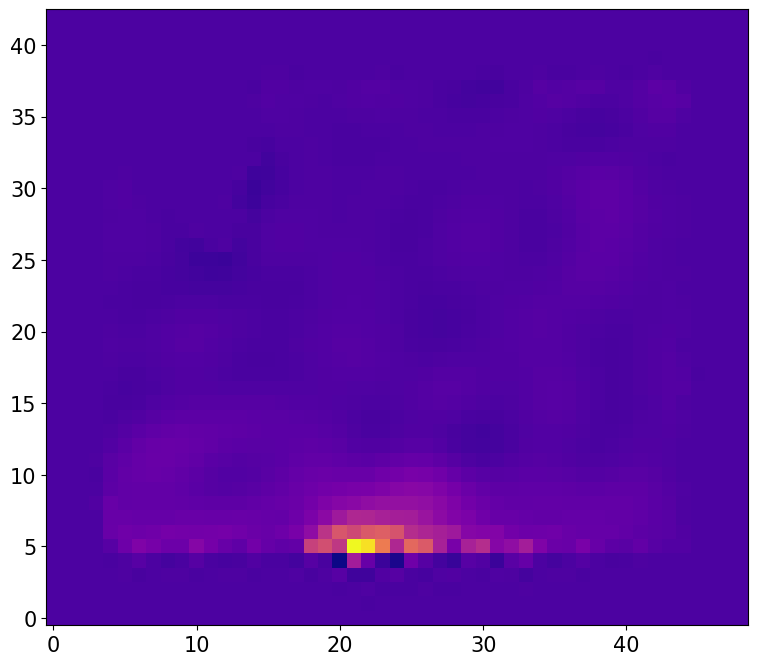

In [82]:
test_reg = rg.Regions.read('./DataFiles/M82_CO21_regions.reg', format="ds9")
reg_str = ['south','north']

#The next few lines crop the big image to only the part of the image in the ds9 region, which is the same RA and Dec of the jwst image
regS=test_reg[1]
maskS = regS.to_mask()
dataS = maskS.cutout(COdata) 

size = u.Quantity(dataS.shape, u.pixel)
cutout = Cutout2D(COdata, regS.center.xy, size, wcs=wcs)
im_maskS= maskS*cutout.data 
CO_south = scipy.ndimage.rotate(im_maskS, angle=-15, reshape=False)
fig, ax = plt.subplots(figsize=(12,8))
im = ax.imshow(CO_south, cmap='plasma', origin="lower")

regN = test_reg[0]
maskN = regN.to_mask()
dataN = maskN.cutout(COdata) 

size = u.Quantity(dataN.shape, u.pixel)
cutout = Cutout2D(COdata, regN.center.xy, size, wcs=w)
im_maskN = maskN*cutout.data 
CO_north = scipy.ndimage.rotate(im_maskN, angle=-15, reshape=False)
fig, ax = plt.subplots(figsize=(12,8))
im = ax.imshow(CO_north, cmap='plasma', origin="lower")
print(np.median(CO_north))

Set OBSGEO-B to     8.864333 from OBSGEO-[XYZ].
Set OBSGEO-H to 1694877744.107 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


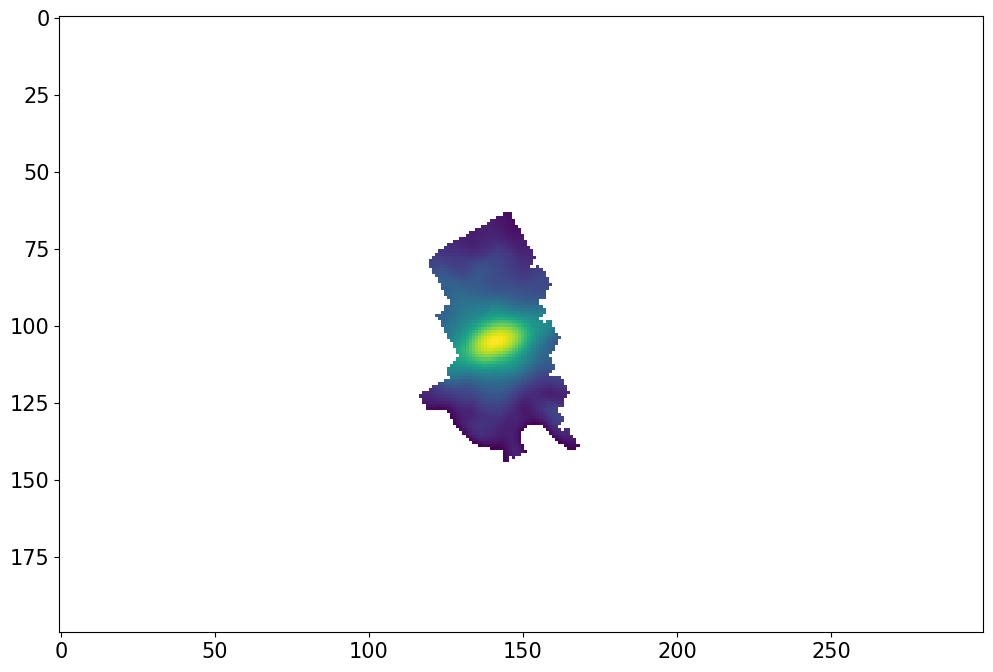

In [83]:
hdulist = fits.open("./JWSTSuperConvolved.fits")
header = hdulist[1].header
IRdata = hdulist[1].data

wcs = WCS(hdulist[1].header)
IRdata = np.where(IRdata<1, 0, IRdata)
np.nan_to_num(IRdata, 0)
fig, ax=plt.subplots(figsize=(12, 8))
ax.imshow(IRdata, norm=LogNorm())

303.45460616123336
836.3032131028411


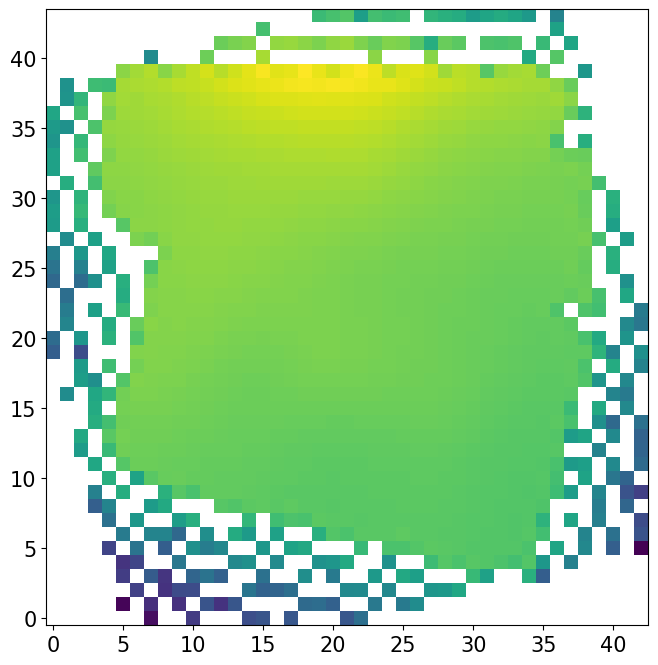

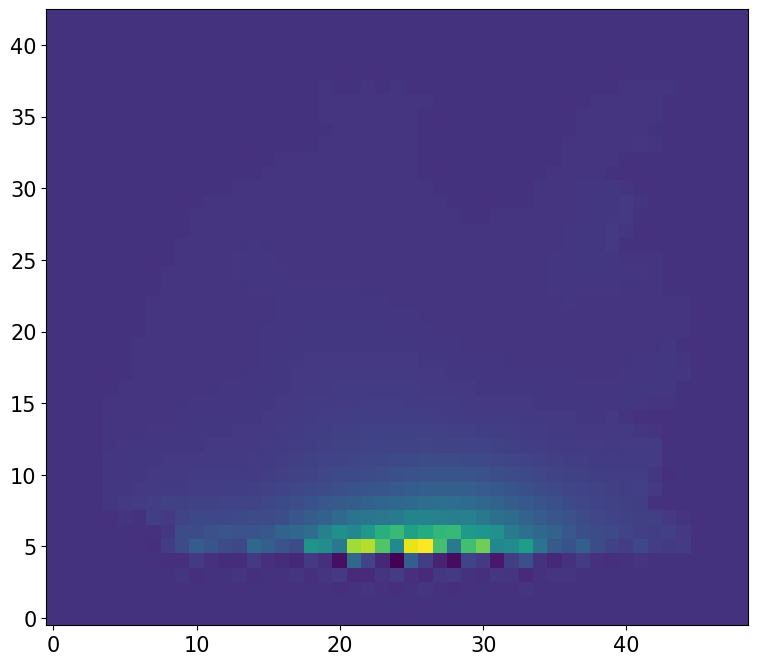

In [84]:
test_reg = rg.Regions.read('./DataFiles/M82_CO21_regions.reg', format="ds9")
reg_str = ['south','north']

#for largereg,rgname in zip(test_reg,reg_str):

reg1 = test_reg[1]
mask = reg1.to_mask()
data = mask.cutout(IRdata)

size = u.Quantity(data.shape, u.pixel)
cutout = Cutout2D(IRdata, reg1.center.xy, size, wcs=wcs)
im_mask= mask*cutout.data

IR_south = scipy.ndimage.rotate(im_mask, angle=-15, reshape=False)

fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(IR_south, origin="lower", norm=LogNorm())
#North
reg1 = test_reg[0]
mask = reg1.to_mask()
data = mask.cutout(IRdata)

size = u.Quantity(data.shape, u.pixel)
cutout = Cutout2D(IRdata, reg1.center.xy, size, wcs=wcs)
im_mask= mask*cutout.data

IR_north = scipy.ndimage.rotate(im_mask, angle=-15, reshape=False)

fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(IR_north, origin="lower")
print(np.max(CO_south))
print(np.max(IR_south))

In [85]:
IR_southList = IR_south.flatten() #Turns the image into a 1d array
IR_northList = IR_north.flatten()
CO_southList = CO_south.flatten()
CO_northList = CO_north.flatten()

def medianLine(x, y, bins): 
    medianX=[]
    medianY=[]
    for i in range(np.size(bins)-1):
        lowX = bins[i]
        highX = bins[i+1]
        rangeMask = np.bitwise_and(lowX<=x, x<highX)
        medianX.append((lowX+highX)/2)
        medianY.append(np.median(y[rangeMask]))
    return medianX, medianY

0.1472393655051749 0.7901413963526805
[0.05, 0.15000000000000002, 0.25, 0.35000000000000003, 0.45, 0.55, 0.6500000000000001, 0.75, 0.8500000000000001, 0.95, 1.05, 1.1500000000000001, 1.25, 1.35, 1.4500000000000002, 1.55, 1.6500000000000001, 1.75, 1.85, 1.9500000000000002, 2.05, 2.1500000000000004, 2.25, 2.3500000000000005, 2.45, 2.55, 2.6500000000000004, 2.75, 2.8500000000000005, 2.95] [0.6396828658092588, 0.3740070565963646, 0.4677361978868459, 0.5503549002705783, 0.39688690561063156, 0.38617382618280893, 0.5067807845597763, 0.6615263476111317, 0.8523831613146131, 0.8080313197329051, 0.7011931892728371, 0.8546144537162347, 0.9550795559532026, 1.0968626771317291, 1.2542721153517284, 1.4368555904051556, 1.5534230784512053, 1.6704448117277297, 1.6547131965804256, 1.7337551727605136, 1.6641751548061092, 1.9300594581805153, 1.9163577772938218, 2.0484378055697703, 2.102965969796867, 2.1919467069039094, 2.27337411781704, 2.3616820700134413, 2.4599787000485325, 2.469788833670186]


C:\Users\Colton\AppData\Local\Temp\ipykernel_8872\3099159389.py:13: RuntimeWarning: invalid value encountered in log10
  IRs = np.log10(IR_southList)
C:\Users\Colton\AppData\Local\Temp\ipykernel_8872\3099159389.py:14: RuntimeWarning: invalid value encountered in log10
  COs = np.log10(CO_southList)
C:\Users\Colton\AppData\Local\Temp\ipykernel_8872\3099159389.py:22: RuntimeWarning: invalid value encountered in log10
  h, xbin, ybin, im = ax.hist2d(np.log10(IR_southList), np.log10(CO_southList), range=[[0,3],[0,3]], bins=(30,30))


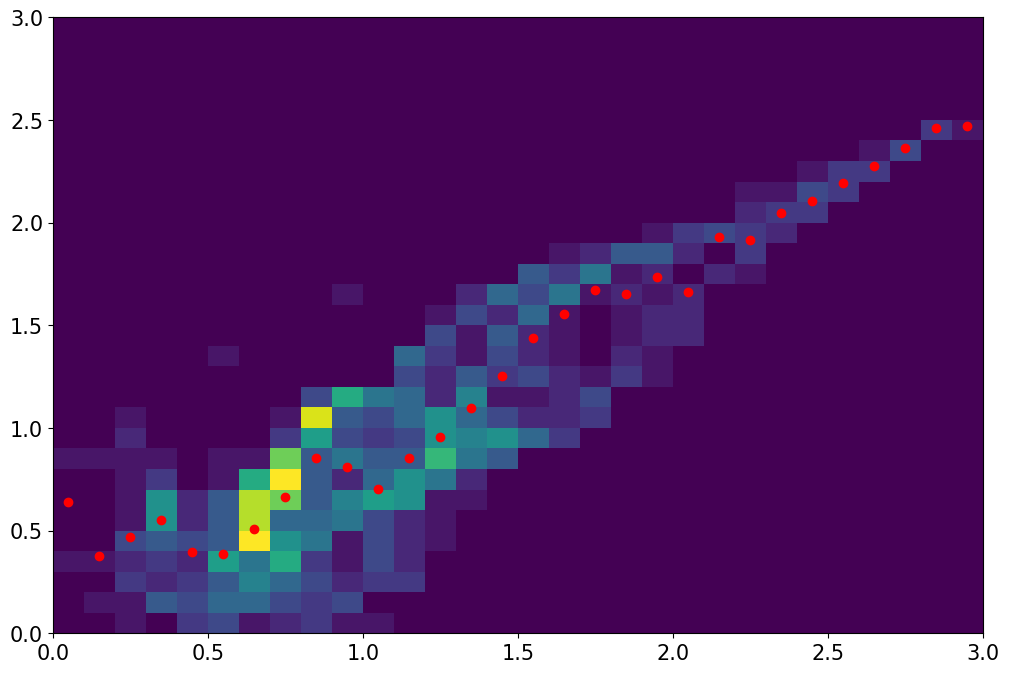

In [86]:
CO_southList = np.where(CO_southList == 0, np.nan, CO_southList) #The next few lines filter out nans

nanMask = np.isnan(CO_southList)

IR_southList = IR_southList[~nanMask]
CO_southList = CO_southList[~nanMask]

nanMask = np.isnan(IR_southList)

IR_southList = IR_southList[~nanMask]
CO_southList = CO_southList[~nanMask]

IRs = np.log10(IR_southList)
COs = np.log10(CO_southList)

mask = COs > 1e-1 #Anything under this range is dominated by noise and likely not even real emission.

COs = COs[mask]
IRs = IRs[mask]

#Plotting
fig, ax = plt.subplots(figsize=(12, 8))
h, xbin, ybin, im = ax.hist2d(np.log10(IR_southList), np.log10(CO_southList), range=[[0,3],[0,3]], bins=(30,30))
medx, medy = medianLine(IRs, COs, xbin)
SMedLine = scipy.stats.linregress(medx, medy)
ax.scatter(medx, medy, color='red')
print(SMedLine.intercept, SMedLine.slope)
print(medx, medy)


nan nan


C:\Users\Colton\AppData\Local\Temp\ipykernel_8872\3839634031.py:13: RuntimeWarning: invalid value encountered in log10
  nIR = np.log10(IR_northList)
C:\Users\Colton\AppData\Local\Temp\ipykernel_8872\3839634031.py:14: RuntimeWarning: invalid value encountered in log10
  nCO = np.log10(CO_northList)
C:\Users\Colton\AppData\Local\Temp\ipykernel_8872\3839634031.py:22: RuntimeWarning: invalid value encountered in log10
  h, xbin, ybin, im = ax.hist2d(np.log10(IR_northList), np.log10(CO_northList), range=[[0,3],[0,3]], bins=(40,40))


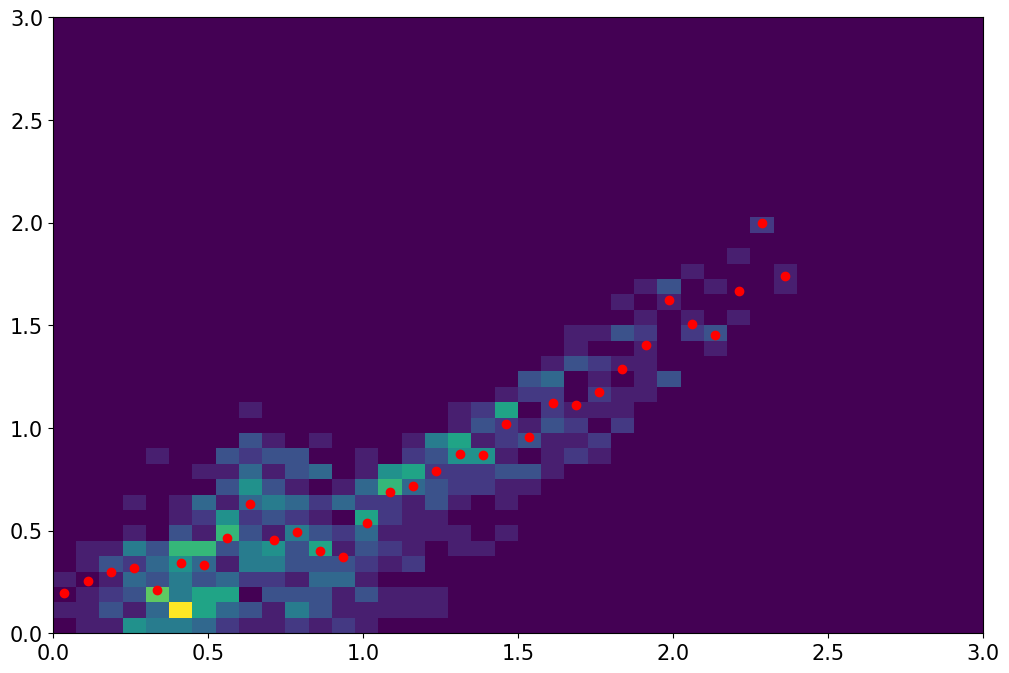

In [98]:
CO_northList = np.where(CO_northList == 0, np.nan, CO_northList) #Filter out nans for north region

nanMask = np.isnan(CO_northList)

IR_northList = IR_northList[~nanMask]
CO_northList = CO_northList[~nanMask]

nanMask = np.isnan(IR_northList)

IR_northList = IR_northList[~nanMask]
CO_northList = CO_northList[~nanMask]

nIR = np.log10(IR_northList)
nCO = np.log10(CO_northList)

mask = nCO > 1e-1

nIR = nIR[mask]
nCO = nCO[mask]

fig, ax = plt.subplots(figsize=(12, 8))
h, xbin, ybin, im = ax.hist2d(np.log10(IR_northList), np.log10(CO_northList), range=[[0,3],[0,3]], bins=(40,40))
medx, medy = medianLine(nIR, nCO, xbin)
ax.scatter(medx, medy, color='red')
NMedLine = scipy.stats.linregress(medx[:-6], medy[:-6])
print(NMedLine.intercept, NMedLine.slope)


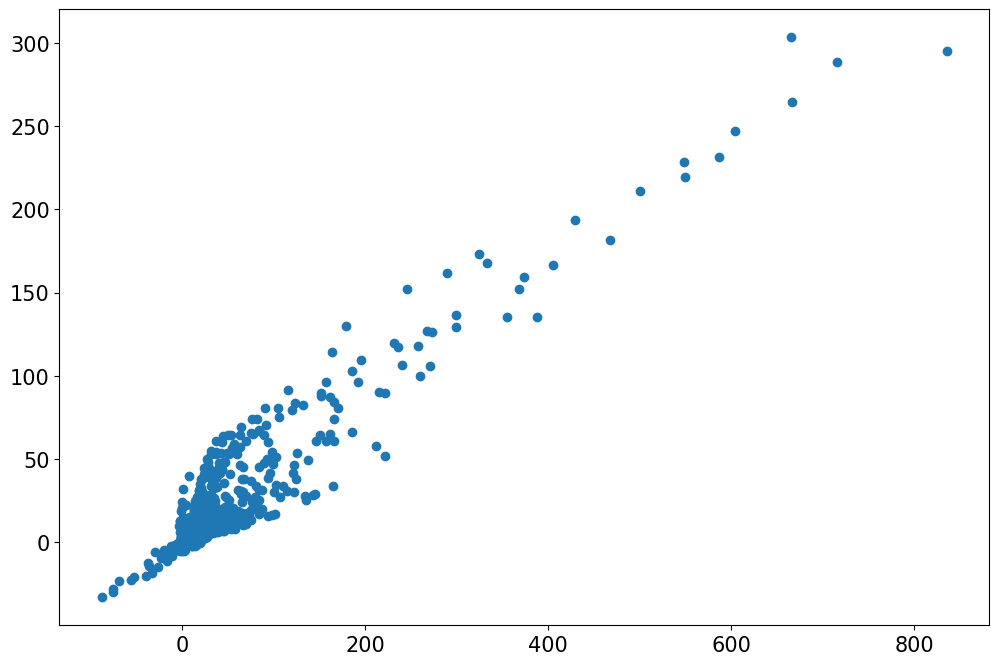

In [88]:
cIR = np.append(IR_southList, IR_northList) #Combine the region data
cCO = np.append(CO_southList, CO_northList)
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(cIR, cCO)


In [89]:
plt.rcParams.update({'font.size': 15})
negs = cIR<1e-2 #This probably isn't necessary
cIR = cIR[~negs]
cCO = cCO[~negs]

pBin = []

i=-3/2
while(i<=7/2):
    pBin.append(i)
    i += 1/6

print(pBin)



def oneSigmaLine(x, y, bins):
    xOut = []
    y16 = []
    y84 = []
    for i in range(np.size(bins)-1):
        lowX = bins[i]
        highX = bins[i+1]
        rangeMask = np.bitwise_and(lowX<=x, x<highX)
        xOut.append((lowX+highX)/2)
        y16.append(np.percentile(y[rangeMask], 16))
        y84.append(np.percentile(y[rangeMask], 84))
    return xOut, y16, y84

[-1.5, -1.3333333333333333, -1.1666666666666665, -0.9999999999999999, -0.8333333333333333, -0.6666666666666666, -0.5, -0.33333333333333337, -0.1666666666666667, -5.551115123125783e-17, 0.1666666666666666, 0.33333333333333326, 0.4999999999999999, 0.6666666666666665, 0.8333333333333331, 0.9999999999999998, 1.1666666666666665, 1.3333333333333333, 1.5, 1.6666666666666667, 1.8333333333333335, 2.0, 2.1666666666666665, 2.333333333333333, 2.4999999999999996, 2.666666666666666, 2.8333333333333326, 2.999999999999999, 3.1666666666666656, 3.333333333333332, 3.4999999999999987]


In [90]:
medx, medy = medianLine(np.log10(cIR), cCO, pBin)

sx, s16, s84 = oneSigmaLine(np.log10(cIR), cCO, pBin[:-3])

medx = medx[5:]
medy = medy[5:]

print(medy)


[0.09857531893070348, 0.35270237033971996, 0.15203889909897403, 0.2877781074430199, 0.049039382287195434, 0.1422343240080361, 0.638679312112932, 1.9147986358904014, 3.1182653771167206, 2.9273630799616095, 4.729200063158734, 7.630532627964049, 10.716078584742574, 16.949620391447297, 21.442519403321615, 34.008366104310376, 39.83418877160407, 84.13229959603937, 117.88942126150677, 162.70866253113036, 229.98221490859805, 291.68323365069693, nan, nan, nan]


[        nan         nan         nan         nan         nan -1.55213039
         nan         nan         nan         nan         nan         nan
 -1.12156568  0.08012039 -0.3986055   0.02926393  0.65006861  0.8366401
  0.94681375  1.09044978  1.22788312  1.45062826  1.78266776  1.96645787
  2.13862318  2.32671157  2.46156329]
-0.08333333333333338
[-0.54094225 -1.30945501 -0.84699559 -0.19471715  0.28212311  0.49391307
  0.46647659  0.67478769  0.88255485  1.03003589  1.22915998  1.33127581
  1.53158577  1.60025598  1.92496276  2.07147484  2.21141068  2.36169425
  2.46491147]
y=1.1465510741029874x-0.6945694920195868


C:\Users\Colton\AppData\Local\Temp\ipykernel_8872\24069557.py:8: RuntimeWarning: invalid value encountered in log10
  logS16 = np.log10(s16)


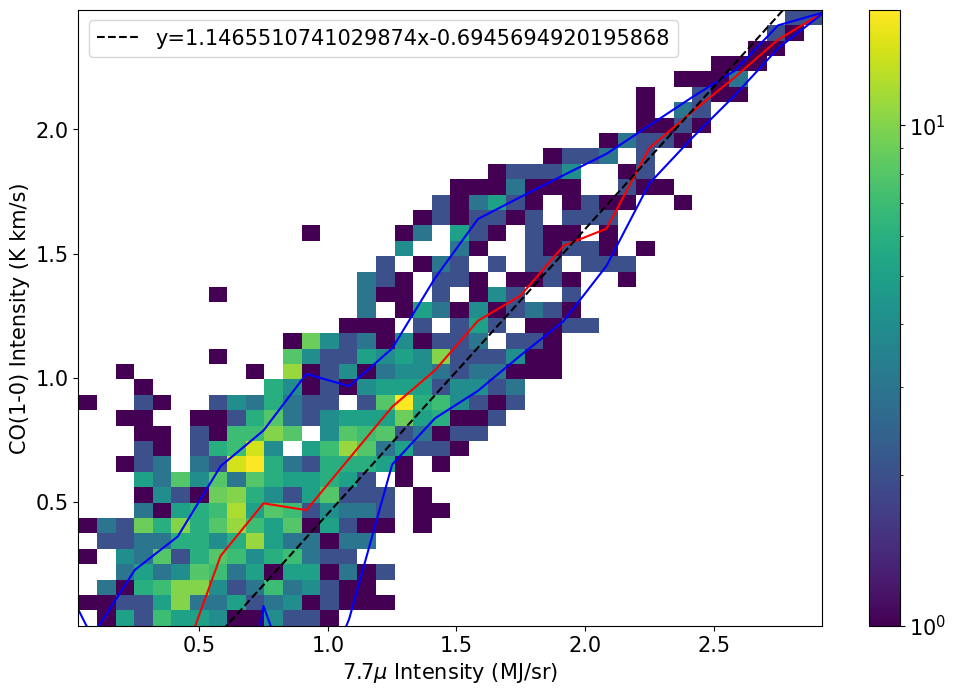

In [91]:

logMedX = medx
logMedY = np.log10(medy)

logMedX = logMedX[3:-3]
logMedY = logMedY[3:-3]

logSX = sx 
logS16 = np.log10(s16)
logS84 = np.log10(s84)



print(logS16)

print(logMedX[0])
print(logMedY)

medLine = scipy.stats.linregress(logMedX, logMedY)

pIm = cIR>1

pIR = cIR[pIm]
pCO = cCO[pIm]

pCm = pCO>1

pIR = pIR[pCm]
pCO = pCO[pCm]

lX = np.linspace(np.min(logMedX), np.max(logMedX))
lY = medLine.slope*lX+medLine.intercept
fig, ax = plt.subplots(figsize=(12,8))
h = ax.hist2d(np.log10(pIR), np.log10(pCO), bins=(40,40), norm=LogNorm())
ax.set_xlabel(r"7.7$\mu$ Intensity (MJ/sr)")
ax.set_ylabel("CO(1-0) Intensity (K km/s)")
ax.plot(logMedX, logMedY, color='red')
ax.plot(logSX, logS16, color='blue')
ax.plot(logSX, logS84, color='blue')
ax.plot(lX, lY, '--', color='black', label="y="+str(medLine.slope)+"x"+str(medLine.intercept))
ax.legend(loc = 'upper left')
fig.colorbar(h[3])
print("y="+str(medLine.slope)+"x"+str(medLine.intercept))
plt.savefig("CO10vsJWST.png")

In [93]:
def powerlaw(x, a, b):
    return a*x**b

fitC = powerlaw
fitD = powerlaw

In [94]:
diskData = []
#This imports PHANGS data. We have the relation at this point so these cells are optional.
import csv
with open('./DataFiles/binned_scaling_relations/binned_co_vs_f770w_all_.csv', newline="\n") as f:
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        subList = []
        for i in row:
            if i.startswith('l'):
                break
            else:
                if i == '':
                    subList.append(np.nan)
                else:
                    subList.append(float(i))
        diskData.append(subList)
                
    f.close()

del diskData[0]
badIndecies = []
for i in range(len(diskData)):
    for j in diskData[i]:
        if j== float('-inf') or j==np.nan:
            badIndecies.append(i)
        else:
            continue
print(badIndecies)
for i in reversed(badIndecies):
    del diskData[i]

diskData = np.array(diskData)
diskX = diskData[:,0]
diskY = diskData[:,1]
diskS = diskData[:,2]

diskX = diskX[5:]
diskY = diskY[5:]
diskS = diskS[5:]

[24, 25, 26, 27, 28]


In [95]:
line = scipy.stats.linregress(diskX, diskY)
m = line.slope
b = line.intercept

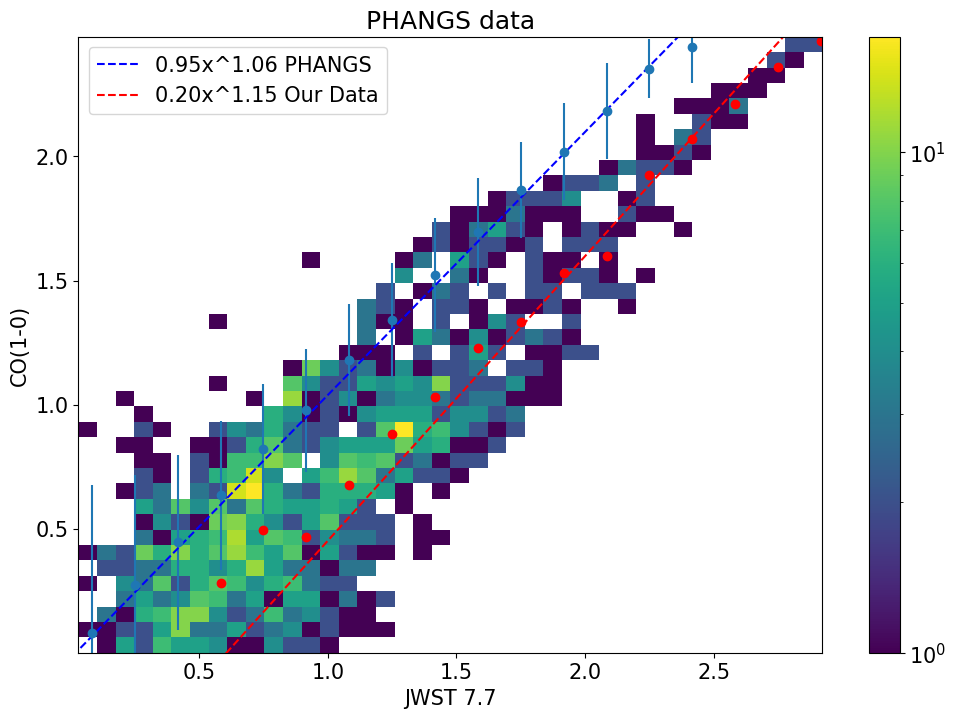

In [96]:
dt, dc = curve_fit(fitD, 10**diskX, 10**diskY)

fig, ax = plt.subplots(figsize=(12,8))
ax.errorbar(diskX, diskY, yerr=diskS, xerr=0, fmt='o')
xLine = np.linspace(-0.5, np.max(diskX), dtype=float)
yLine = m*xLine+b
ax.plot(xLine, yLine, 'b--', label="0.95x^1.06 PHANGS")
h = ax.hist2d(np.log10(pIR), np.log10(pCO), bins=(40,40), norm=LogNorm())
ax.scatter(logMedX, logMedY, color='red')
ax.plot(lX, lY, 'r--', label="0.20x^1.15 Our Data")
ax.legend(loc = 'upper left')
fig.colorbar(h[3])
ax.set_xlabel("JWST 7.7")
ax.set_ylabel("CO(1-0)")
ax.set_title("PHANGS data")
ax.legend()
#plt.savefig("./Plots/phangsJWST.png")
